In [5]:
import pandas as pd

In [9]:
df=pd.read_csv('MSFT.csv')



In [10]:
def generate_moving_averages(df, window_sizes=[7, 30, 90]):
    for window in window_sizes:
        df[f'ma_{window}_Close'] = df['Close'].rolling(window=window).mean()
        df[f'ma_{window}_Volume'] = df['Volume'].rolling(window=window).mean()
    return df
generate_moving_averages(df)

,Date,Open,High,Low,Close,Adj Close,Volume,ma_7_Close,ma_7_Volume,ma_30_Close,ma_30_Volume,ma_90_Close,ma_90_Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000,NaN,NaN,NaN,NaN,NaN,NaN
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200,NaN,NaN,NaN,NaN,NaN,NaN
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400,157.874287,2.111944e+07,153.138334,2.100501e+07,144.226445,2.231299e+07
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100,158.332857,1.671153e+07,153.481000,2.104128e+07,144.529001,2.213647e+07
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200,158.505713,1.719696e+07,153.755334,2.094730e+07,144.786445,2.214540e+07
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700,158.741427,1.888617e+07,154.069000,2.078453e+07,145.045223,2.211997e+07


In [13]:
def generate_volatility_measures(df):
    df['std_Close'] = df['Close'].rolling(window=30).std()
    df['ATR'] = df.apply(lambda row: max(row['High'] - row['Low'], abs(row['High'] - row['Close']), abs(row['Low'] - row['Close'])), axis=1)
    return df
generate_volatility_measures(df)


,Date,Open,High,Low,Close,Adj Close,Volume,ma_7_Close,ma_7_Volume,ma_30_Close,ma_30_Volume,ma_90_Close,ma_90_Volume,std_Close,ATR
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013021
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005209
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002605
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004341
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400,157.874287,2.111944e+07,153.138334,2.100501e+07,144.226445,2.231299e+07,3.216381,1.320007
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100,158.332857,1.671153e+07,153.481000,2.104128e+07,144.529001,2.213647e+07,3.447288,2.399994
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200,158.505713,1.719696e+07,153.755334,2.094730e+07,144.786445,2.214540e+07,3.519538,1.889999
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700,158.741427,1.888617e+07,154.069000,2.078453e+07,145.045223,2.211997e+07,3.557395,2.590011


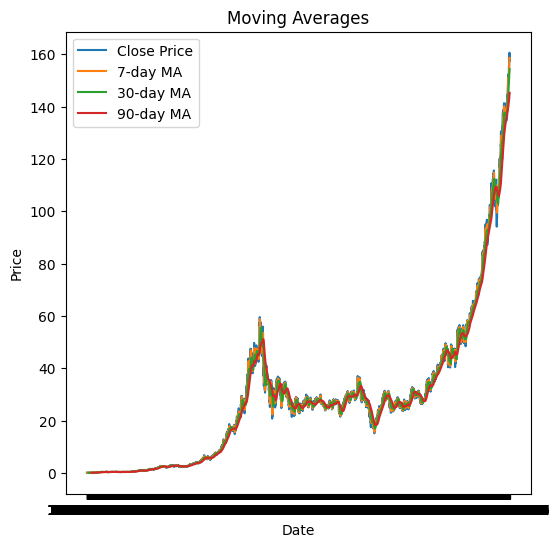

In [33]:
import matplotlib.pyplot as plt

def plot_moving_averages(df):
    plt.figure(figsize=(6, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.plot(df['Date'], df['ma_7_Close'], label='7-day MA')
    plt.plot(df['Date'], df['ma_30_Close'], label='30-day MA')
    plt.plot(df['Date'], df['ma_90_Close'], label='90-day MA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Moving Averages')
    plt.legend()
    plt.show()
plot_moving_averages(df)



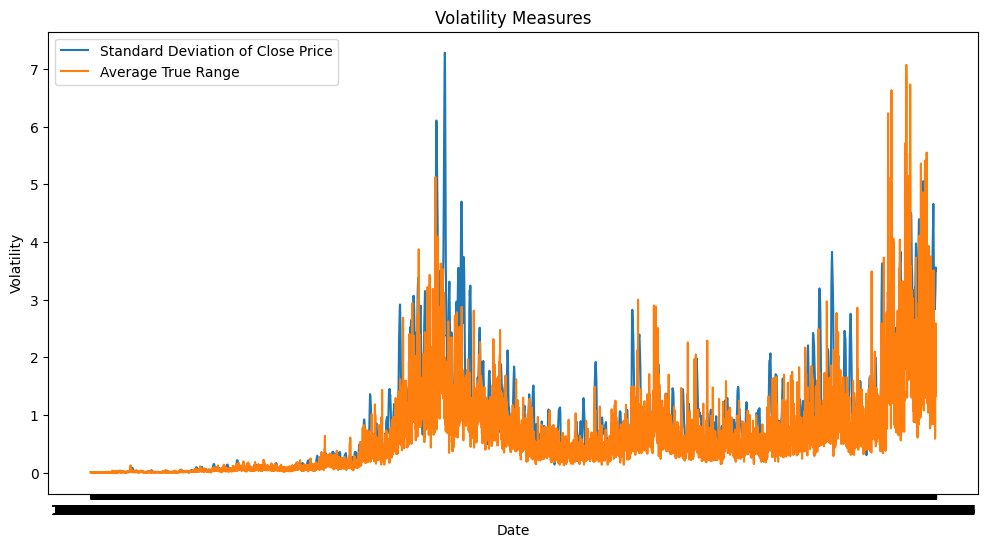

In [15]:
def plot_volatility_measures(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['std_Close'], label='Standard Deviation of Close Price')
    plt.plot(df['Date'], df['ATR'], label='Average True Range')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.title('Volatility Measures')
    plt.legend()
    plt.show()
plot_volatility_measures(df)

In [16]:
def generate_lag_features(df, lag_values=[1, 2, 3]):
    for lag in lag_values:
        df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    return df
generate_lag_features(df, lag_values=[1, 2, 3])

,Date,Open,High,Low,Close,Adj Close,Volume,ma_7_Close,ma_7_Volume,ma_30_Close,ma_30_Volume,ma_90_Close,ma_90_Volume,std_Close,ATR,Close_lag_1,Close_lag_2,Close_lag_3
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013021,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005209,0.097222,NaN,NaN
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002605,0.100694,0.097222,NaN
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004341,0.102431,0.100694,0.097222
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003472,0.099826,0.102431,0.100694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400,157.874287,2.111944e+07,153.138334,2.100501e+07,144.226445,2.231299e+07,3.216381,1.320007,157.589996,158.960007,158.669998
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100,158.332857,1.671153e+07,153.481000,2.104128e+07,144.529001,2.213647e+07,3.447288,2.399994,157.699997,157.589996,158.960007
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200,158.505713,1.719696e+07,153.755334,2.094730e+07,144.786445,2.214540e+07,3.519538,1.889999,160.619995,157.699997,157.589996
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700,158.741427,1.888617e+07,154.069000,2.078453e+07,145.045223,2.211997e+07,3.557395,2.590011,158.619995,160.619995,157.699997


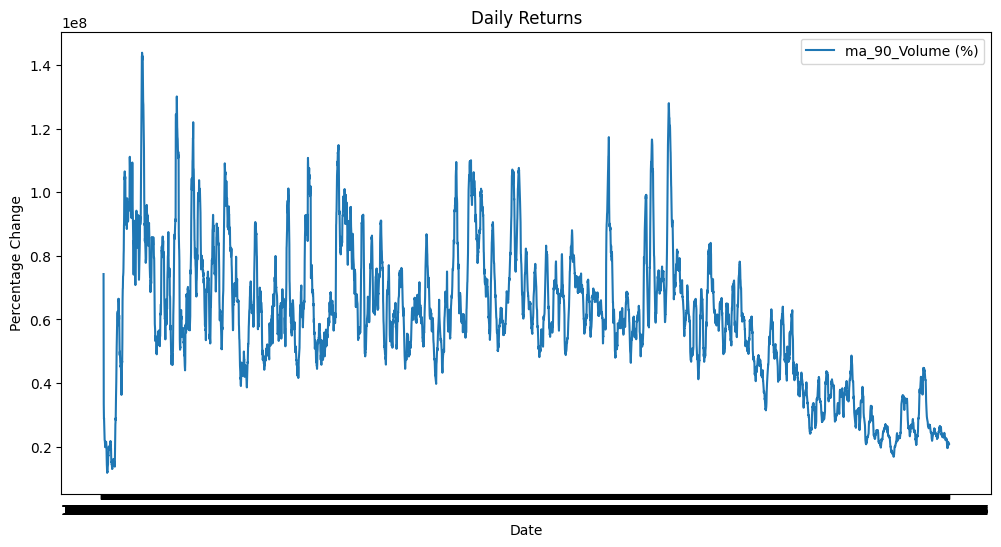

In [18]:
def plot_daily_returns(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['ma_30_Volume'], label='ma_90_Volume (%)')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.title('Daily Returns')
    plt.legend()
    plt.show()
plot_daily_returns(df)


In [19]:
def generate_rolling_stats(df, window_size=7):
    df['min_Close'] = df['Close'].rolling(window=window_size).min()
    df['max_Close'] = df['Close'].rolling(window=window_size).max()
    df['mean_Close'] = df['Close'].rolling(window=window_size).mean()
    return df
generate_rolling_stats(df, window_size=7)


,Date,Open,High,Low,Close,Adj Close,Volume,ma_7_Close,ma_7_Volume,ma_30_Close,...,ma_90_Close,ma_90_Volume,std_Close,ATR,Close_lag_1,Close_lag_2,Close_lag_3,min_Close,max_Close,mean_Close
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062549,1031788800,NaN,NaN,NaN,...,NaN,NaN,NaN,0.013021,NaN,NaN,NaN,NaN,NaN,NaN
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064783,308160000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.005209,0.097222,NaN,NaN,NaN,NaN,NaN
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065899,133171200,NaN,NaN,NaN,...,NaN,NaN,NaN,0.002605,0.100694,0.097222,NaN,NaN,NaN,NaN
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064224,67766400,NaN,NaN,NaN,...,NaN,NaN,NaN,0.004341,0.102431,0.100694,0.097222,NaN,NaN,NaN
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063107,47894400,NaN,NaN,NaN,...,NaN,NaN,NaN,0.003472,0.099826,0.102431,0.100694,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,2019-12-31,156.770004,157.770004,156.449997,157.699997,157.699997,18369400,157.874287,2.111944e+07,153.138334,...,144.226445,2.231299e+07,3.216381,1.320007,157.589996,158.960007,158.669998,157.380005,158.960007,157.874287
8521,2020-01-02,158.779999,160.729996,158.330002,160.619995,160.619995,22622100,158.332857,1.671153e+07,153.481000,...,144.529001,2.213647e+07,3.447288,2.399994,157.699997,157.589996,158.960007,157.380005,160.619995,158.332857
8522,2020-01-03,158.320007,159.949997,158.059998,158.619995,158.619995,21116200,158.505713,1.719696e+07,153.755334,...,144.786445,2.214540e+07,3.519538,1.889999,160.619995,157.699997,157.589996,157.380005,160.619995,158.505713
8523,2020-01-06,157.080002,159.100006,156.509995,159.029999,159.029999,20813700,158.741427,1.888617e+07,154.069000,...,145.045223,2.211997e+07,3.557395,2.590011,158.619995,160.619995,157.699997,157.589996,160.619995,158.741427


<ipython-input-21-8d0557c06a08>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


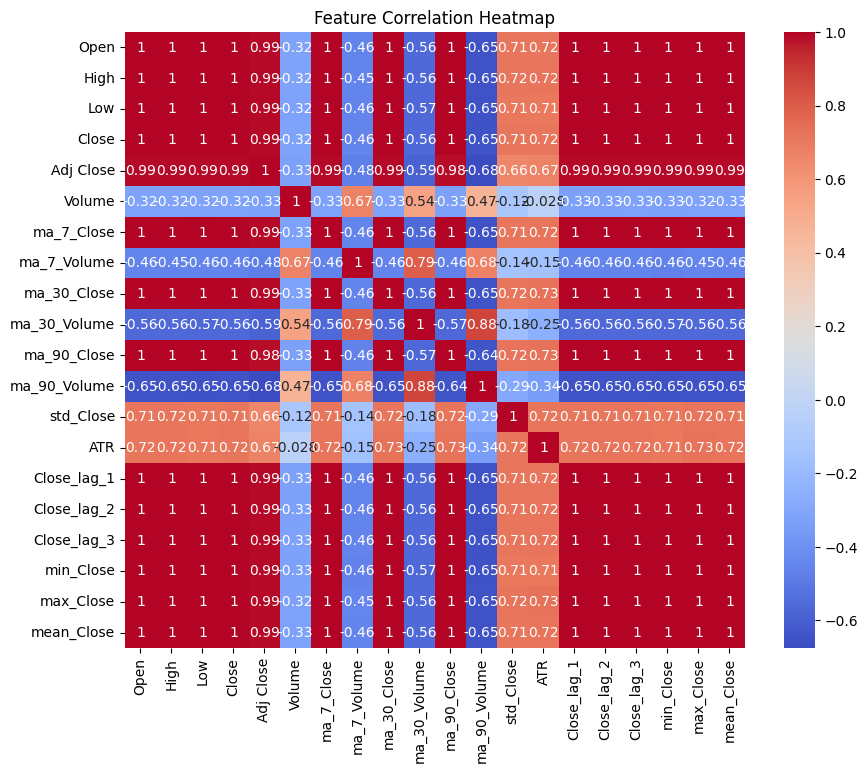

In [21]:
import seaborn as sns

def plot_correlation_heatmap(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()
plot_correlation_heatmap(df)

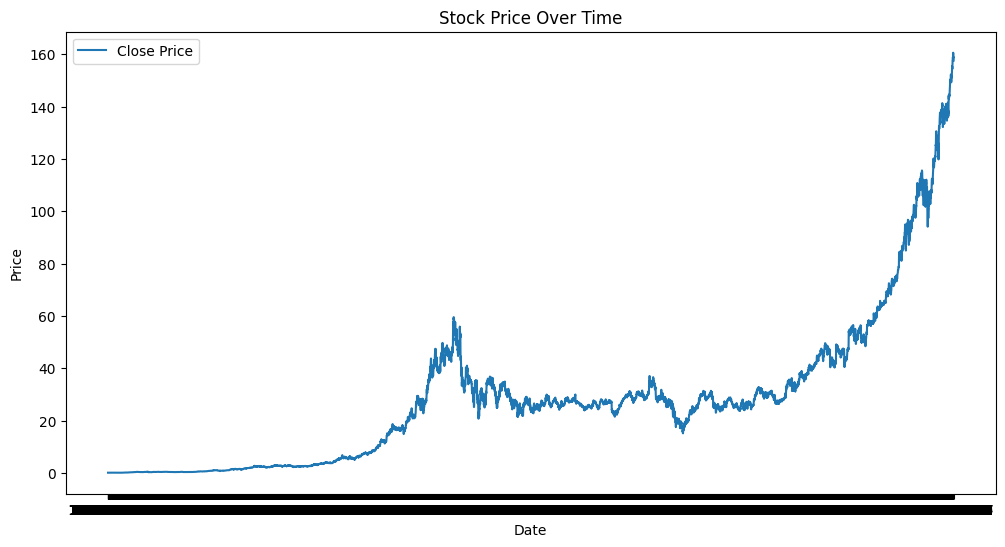

In [26]:
import matplotlib.pyplot as plt

def plot_stock_price(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Price Over Time')
    plt.legend()
    plt.show()
plot_stock_price(df)



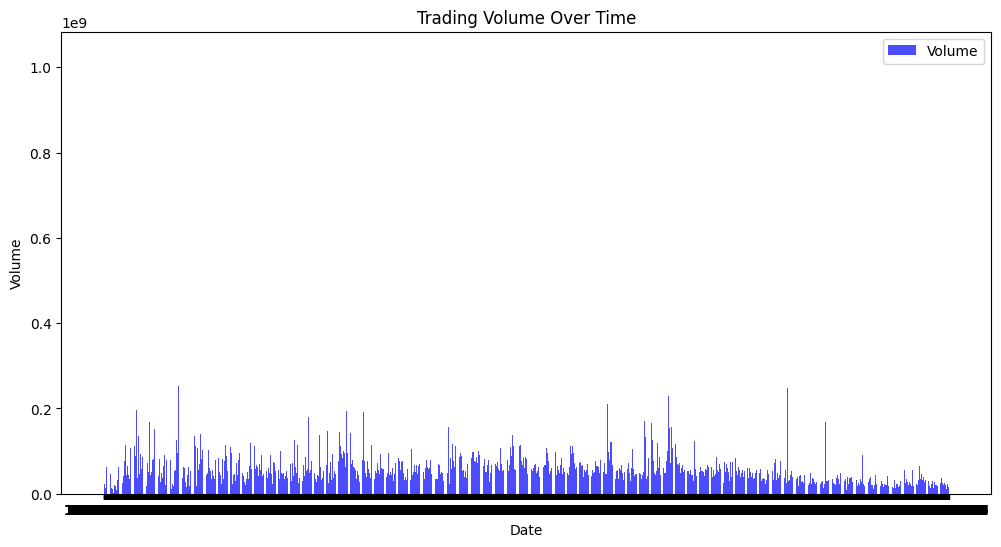

In [27]:
def plot_volume(df):
    plt.figure(figsize=(12, 6))
    plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.7, label='Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title('Trading Volume Over Time')
    plt.legend()
    plt.show()
plot_volume(df)


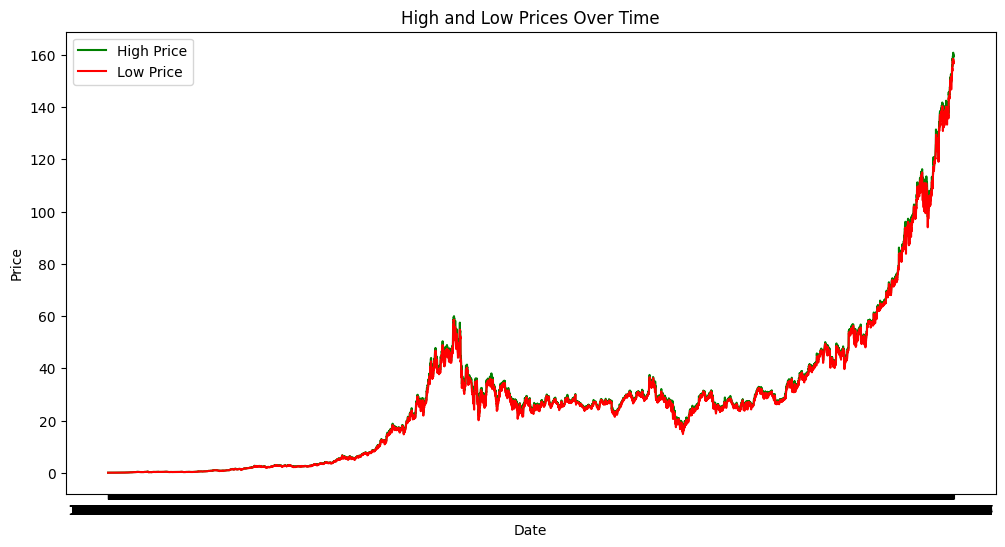

In [29]:
def plot_price_range(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['High'], label='High Price', color='green')
    plt.plot(df['Date'], df['Low'], label='Low Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('High and Low Prices Over Time')
    plt.legend()
    plt.show()
plot_price_range(df)



In [31]:
#model training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have already done feature engineering and have a DataFrame 'df' with relevant features

# Define your features and target variable
X = df[['Open', 'High', 'Low']]  # Replace with your actual feature names
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.05056903911449082


In [32]:
#LSTM MODEL
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Assuming you have already done feature engineering and have a DataFrame 'df' with relevant features

# Prepare the data for LSTM
def prepare_lstm_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data) - 1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define the number of time steps for the LSTM
n_steps = 30  # You can adjust this based on your dataset

# Prepare data and reshape for LSTM
X, y = prepare_lstm_data(df['Close'], n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error: {mse}')


Epoch 1/50
213/213 [==============================] - 5s 14ms/step - loss: 253.2241
Epoch 2/50
213/213 [==============================] - 3s 14ms/step - loss: 1.7216
Epoch 3/50
213/213 [==============================] - 4s 19ms/step - loss: 1.2818
Epoch 4/50
213/213 [==============================] - 3s 16ms/step - loss: 1.6739
Epoch 5/50
213/213 [==============================] - 3s 14ms/step - loss: 1.3890
Epoch 6/50
213/213 [==============================] - 3s 14ms/step - loss: 1.0743
Epoch 7/50
213/213 [==============================] - 4s 19ms/step - loss: 1.7854
Epoch 8/50
213/213 [==============================] - 3s 14ms/step - loss: 1.4570
Epoch 9/50
213/213 [==============================] - 3s 14ms/step - loss: 1.3439
Epoch 10/50
213/213 [==============================] - 3s 14ms/step - loss: 1.1458
Epoch 11/50
213/213 [==============================] - 4s 19ms/step - loss: 1.0237
Epoch 12/50
213/213 [==============================] - 3s 14ms/step - loss: 0.8988
Epoch 13/50

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate R-squared (R2) Score
    r2 = r2_score(y_test, y_pred)

    return {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
evaluate_model(model, X_test, y_test)


54/54 [==============================] - 0s 5ms/step


{'MSE': 0.830635523764708,
 'RMSE': 0.9113920801525038,
 'R2 Score': 0.9990752888489175}

In [39]:
# Assuming 'model' is your trained model, and 'X_test' and 'y_test' are your test data
results = evaluate_model(model, X_test, y_test)
print(results)


54/54 [==============================] - 0s 5ms/step
{'MSE': 0.830635523764708, 'RMSE': 0.9113920801525038, 'R2 Score': 0.9990752888489175}


54/54 [==============================] - 1s 9ms/step


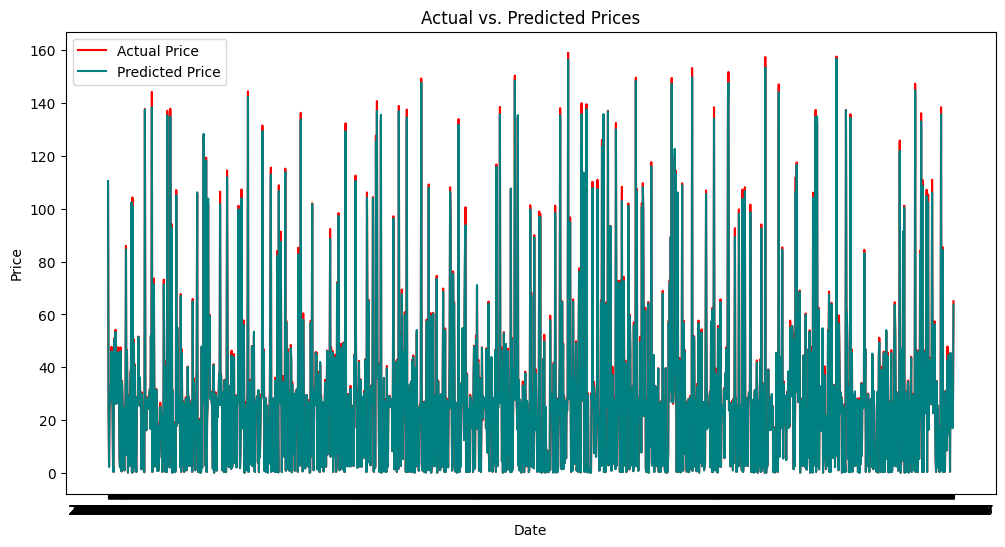

In [51]:
def plot_predictions(model, X_test, y_test, df):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'].iloc[-len(y_test):], y_test, label='Actual Price', color='red')
    plt.plot(df['Date'].iloc[-len(y_test):], y_pred, label='Predicted Price', color='teal')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Prices')
    plt.legend()
    plt.show()
plot_predictions(model, X_test, y_test, df)

